# Lab 4

**Name : Sneha Gupta <br>
RegNo: 21112341 <br>
Class: 4BScEA** 
****

### **Objective:** <br>
Perform linear regression and the properties of Linear regression

### **Problem Statement:** <br>
Perform linear regression and check for Linearity, Multicollinearity, Homoscedaticity, No Autocorrelation and Normality.

### **Methodology:** <br>
* Import excel file
* Check for null values
* Perform Model Training and Testing using Linear Regression
* Display accuracy score and predicted output
* Check for Linearity Multicollinearity, Homoscedaticity, No Autocorrelation and Normality

### **Observation:** <br>
* The model accuracy is 97% 
* There is a linear relationship between independent variables(feature1, feature2, feature3) and dependent variable (target).
* VIF is low as it is lower than 5
* The error terms are normally distributed.
* The variance of error terms is constant.
* There is no autocorrelation between the error terms.

In [65]:
#Importing necessary libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

### **Learnings:** <br>
* This assignment helped to learn about the characterstics of Linear Regression like Linearity, Multicollinearity, Homoscedaticity, No Autocorrelation and Normality.
* How to plot subplots using matplot.
* Codes to check characterstics of linear regression like VIF, scatter plots etc.

In [2]:
df = pd.read_csv("C:\\Users\\Lenovo\\Downloads\\Company_Profit.csv",index_col=False)
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
#Checking for null values

df.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [4]:
X = df.drop(['Profit','State'],axis=1)
y = df['Profit']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,random_state = 30)

In [6]:
# Defining the Model
lr = LinearRegression()

In [7]:
# Fitting the Model
lr.fit(X_train, y_train)

LinearRegression()

In [8]:
y_pred = lr.predict(X_test)

In [9]:
# Evaluation Metrics
print("MODEL ACCURACY = {}".format(r2_score(y_test, y_pred)))

MODEL ACCURACY = 0.9352862461522866


C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


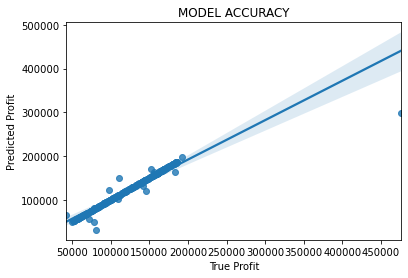

In [10]:
sns.regplot(y_test, y_pred)
plt.xlabel("True Profit")
plt.ylabel("Predicted Profit")
plt.title('MODEL ACCURACY')
plt.show()

In [11]:
print("COEFFICIENTS = {}".format(lr.coef_))
print("INTERCEPT = {}".format(lr.intercept_))

COEFFICIENTS = [0.58729354 0.86370835 0.07462238]
INTERCEPT = -51640.69824895455


### Check if LR is the best
1. Linear line exists between input and output
2. No multicollinearity (X1, X2, X3 should not be correlated because other features will also change rather than remaining constant. We can't get to know individual impact of a variable on dependent)
3. Normality of residuals (errors should have a normal distribution)
4. Homoscedasticity (constant variance of error terms)
5. No autocrrelation of errors (no pattern between error terms)

### `LINEARITY`

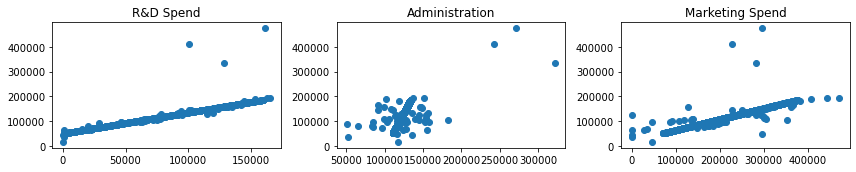

In [12]:
fig, (x1,x2,x3) = plt.subplots(ncols=3,figsize=(12,2.5))
x1.scatter(df['R&D Spend'],df['Profit'])
x1.set_title("R&D Spend")
x2.scatter(df['Administration'], df['Profit'])
x2.set_title("Administration")
x3.scatter(df['Marketing Spend'], df['Profit'])
x3.set_title("Marketing Spend")
fig.tight_layout() #to give spacing bwtween plots
plt.show()

# Y is always continuous
# X can be discrete(State) and Continuous

Observation: There is a linear relationship between Independent variables(R&D Spend, Administration, Marketing Spend) and the Dependent variable(Profit).

### `MULTICOLLINEARITY`

In [13]:
vif=[]
for i in range(len(X_train.columns)):
    vif.append(variance_inflation_factor(X_train.values,i))

In [14]:
pd.DataFrame({"VIF" : vif},index=df.columns[0:3]).T

,R&D Spend,Administration,Marketing Spend
VIF,70.342519,15.880667,125.434693


<AxesSubplot:>

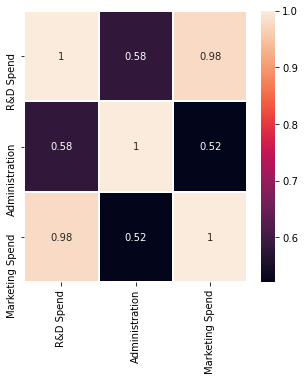

In [15]:
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(df.iloc[:,0:3].corr(), annot=True,linewidths=1)

### `NORMALITY OF RESIDUAL`

In [16]:
residual = y_test - y_pred

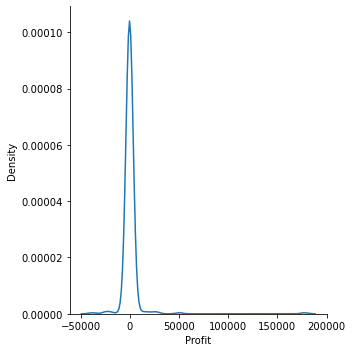

In [17]:
#KDE Plot
sns.displot(residual,kind='kde')

Observation: It is normally distributed

### `HOMOSCEDATICITY`

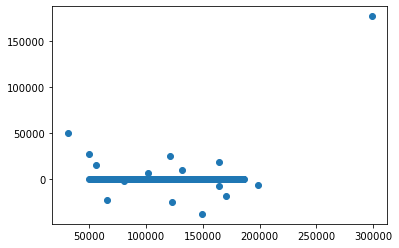

In [18]:
plt.scatter(y_pred,residual)

Observation: It is heteroscedastic as the variance between error terms is not constant.

### `NO AUTOCORRELATION`

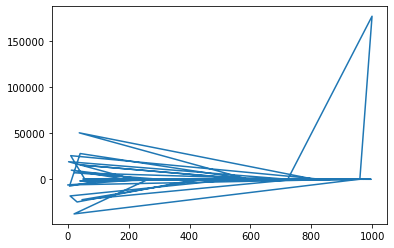

In [19]:
plt.plot(residual)

Observation: No autocorrelation as there is no patterns associated between error terms

# `SECOND DATASET`

In [20]:
df1 = pd.read_excel("C:\\Users\\Lenovo\\Downloads\\test.xlsx",index_col=False)
df1.head()

,feature1,feature2,feature3,target
0,-0.570563,1.420342,0.495580,-9.763182
1,-0.990563,0.556965,1.045064,-24.029355
2,-0.674728,0.150617,1.774645,45.616421
3,0.388250,-0.387127,-0.110229,34.135737
4,1.167882,-0.024104,0.145063,86.663647


In [21]:
#Checking for null values

df1.isna().sum()

feature1    0
feature2    0
feature3    0
target      0
dtype: int64

In [22]:
XX = df1.drop(['target'],axis=1)
yy = df1['target']

In [23]:
XX_train, XX_test, yy_train, yy_test = train_test_split(XX, yy, test_size = 0.3,random_state = 30)

In [24]:
# Defining the Model
lr = LinearRegression()

In [25]:
# Fitting the Model
lr.fit(XX_train, yy_train)

LinearRegression()

In [26]:
yy_pred = lr.predict(XX_test)

In [27]:
# Evaluation Metrics
print("MODEL ACCURACY = {}".format(r2_score(yy_test, yy_pred)))

MODEL ACCURACY = 0.9756136663146106


C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


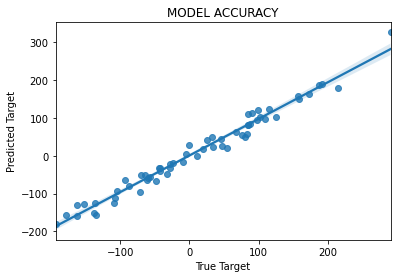

In [28]:
sns.regplot(yy_test, yy_pred)
plt.xlabel("True Target")
plt.ylabel("Predicted Target")
plt.title('MODEL ACCURACY')
plt.show()

In [29]:
print("COEFFICIENTS = {}".format(lr.coef_))
print("INTERCEPT = {}".format(lr.intercept_))

COEFFICIENTS = [74.35132087 -0.1709771  52.90001512]
INTERCEPT = 0.4120443745879745


### `LINEARITY`


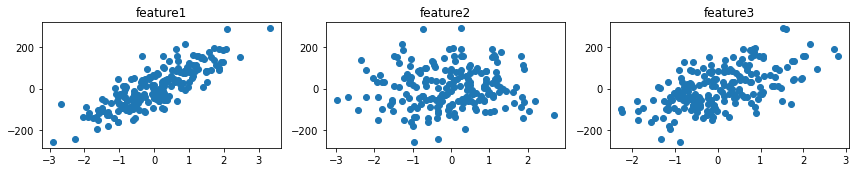

In [30]:
fig, (x1,x2,x3) = plt.subplots(ncols=3,figsize=(12,2.5))
x1.scatter(df1['feature1'],df1['target'])
x1.set_title("feature1")
x2.scatter(df1['feature2'], df1['target'])
x2.set_title("feature2")
x3.scatter(df1['feature3'], df1['target'])
x3.set_title("feature3")
fig.tight_layout() #to give spacing bwtween plots
plt.show()

# Y is always continuous
# X can be discrete(State) and Continuous

**Observation:** There is a linear relationship between independent variables(feature1, feature2, feature3) and dependent variable (target).

### `MULTICOLLINEARITY`

In [31]:
vif=[]
for i in range(len(XX_train.columns)):
    vif.append(variance_inflation_factor(XX_train.values,i))

In [32]:
pd.DataFrame({"VIF" : vif},index=df1.columns[0:3]).T

,feature1,feature2,feature3
VIF,1.002462,1.004488,1.006145


**Observation:** VIF is low as it is lower than 5

### `NORMALITY OF RESIDUAL`

In [33]:
residual1 = yy_test - yy_pred

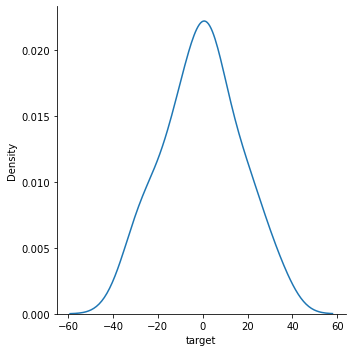

In [34]:
#KDE Plot
sns.displot(residual1,kind='kde')

**Observation:** The error terms are normally distributed.

### `HOMOSCEDATICITY`

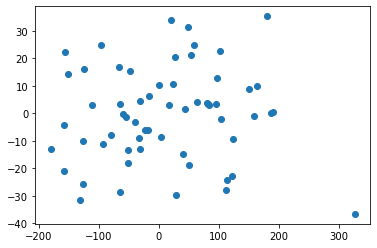

In [35]:
plt.scatter(yy_pred,residual1)

**Observation:** The variance of error terms is constant.

### `NO AUTOCORRELATION`

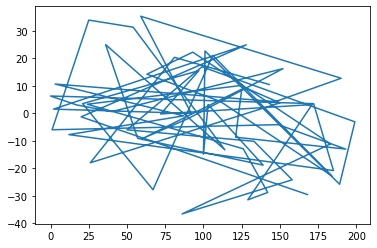

In [36]:
plt.plot(residual1)

### `Ridge`

**Observation:** There is no autocorrelation between the error terms.

In [56]:
ridge = Ridge().fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

Training set score: 0.95
Test set score: 0.94


In [63]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge10.score(X_test, y_test)))

Training set score: 0.95
Test set score: 0.94


In [58]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge01.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge01.score(X_test, y_test)))

Training set score: 0.95
Test set score: 0.94


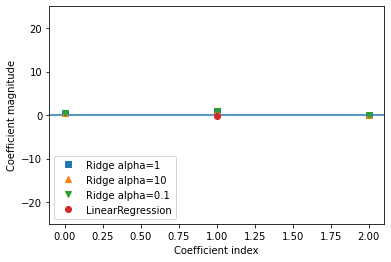

In [59]:
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")
plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-25, 25)
plt.legend()

### `Lasso`

In [67]:
lasso = Lasso().fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))

Training set score: 0.95
Test set score: 0.94
